# ML App to Create a Custom Newsfeed

## Introduction:

Reading is an excellent way to fill in any knowledge gap. It is even better if there is a way to enchance this experience whereby to quickly get a customised newsfeed tailored to the reader's interests. This project/app aims to help frequent readers such as myself to find even more to read or rather, to satisfy curiousities on certain topics. It can be seen as beneficial to have what you want to read without going through the hassle of digging for it. 

Hopefully by the end of this project, a system can be built that is able to understand a tailored taste in news and be able to send them directly to the user.

## Breakdown of the Project:
- Making a supervised training set with the Pocket App.
- Utilising the Pocket API to obtain stories.
- Making use of the Embedly API to extract story bodies.
- Basics of NLP (Natural Language Processing)
- Classifiers such as SVM (Support Vector Machines)
- IFTTT will be integrated with RSS feeds and Google Sheets.
- Setup a system for a daily personal newsletters

## Installing Pocket Chrome Extension for this project:

The Pocket app/extension allows for saving personalised stories to be read later on. The stories can be linked to tags, and these tags can be different to every user. From this, the idea is to use to to tag 'y' for interesting topics while 'n' for non-interesting topics. Usage of the Pocket app/extension to help create a __supervised training__ set for the model.

Setup and example of usage:
1. Open Chrome, and add Pocket app in the Extensions.
2. Open any link of interest.
3. Click on the Pocket extension icon, once red, it means the article or link have been saved.

To begin constructing the supervised dataset:
1. As you go through your day, read your articles.
2. Tag 'y' for interesting ones, and tag 'n' for non-interesting ones.
3. Note: it is better to have lots (100s) of articles to make the model better.

Retrive the save stories:
1. Go to: https://getpocket.com/developer/apps/new
2. Click on 'Create a New App' in the top left corner of the webpage.
3. Input the details and get the API KEY.
4. Be sure to click on all the Permissions (allows for adding, changing and retrieving)
5. Once done, click to submit.
6. Click on 'My Apps' in the top left corner fo the webpage and you will see the custom applications.

After these, move on to the next stage which is the code below.

## 1 Import the required Libraries:

In [2]:
import numpy as np
import pandas as pd
import requests
import json
import os

## 2 Setup Authorisations:

This section requires the Pocket API key (consumer key) and a redirect URL. Note that the redirect URL can be anything here. For example, it can be a twitter account  or otherwise. For more information on Redirect URL: https://www.hostgator.com/blog/ways-redirect-website-url/.

In this case, a twitter account was used.

In [2]:
pd.set_option('display.max_colwidth', 200)

# Get Pocket API Key:
def get_API_KEY(APIKEY_fileName):
    currentDirectory = os.getcwd()
    path_to_API_KEY = currentDirectory + '/' + APIKEY_fileName
    API_KEY_file = open(path_to_API_KEY)
    
    API_KEY = []
    for i in API_KEY_file:
        API_KEY.append(i)
    
    return str(API_KEY[0])

In [3]:
pocket_API_key = get_API_KEY('Pocket API Key.txt')
print(pocket_API_key)

89714-63913284a8c8d0a2e346b63d


In [4]:
# Get Redirect URL from text file:
def get_REDIRECT_URL(RURL_fileName):
    currentDirectory = os.getcwd()
    RURL_path = currentDirectory + '/' + RURL_fileName
    URL_file = open(RURL_path)
    
    RedirectURL = []
    for i in URL_file:
        RedirectURL.append(i)
    
    return str(RedirectURL[0])

In [5]:
Redirect_URL_key = get_REDIRECT_URL('TwitterAccount.txt')
print(Redirect_URL_key)

https://www.twitter.com/YSLee65720613


In [6]:
# Authentication Parameters:
auth_params = {'consumer_key': pocket_API_key, 'redirect_uri': Redirect_URL_key}

token = requests.post('https://getpocket.com/v3/oauth/request', data = auth_params)

print('Access code is: ')
print(token.text)

Access code is: 
code=111de5ef-164f-fad5-beee-953bca


#### Next, is to copy the following output link and AUTHORISE it:

If issues are encountered, use the following link to troubleshoot: http://www.jamesfmackenzie.com/getting-started-with-the-pocket-developer-api/#step-3-visit-the-pocket-website-to-authorize-your-app

Note: Keep the link open for the next few steps, otherwise a 403 forbidden error will occur.

In [7]:
# Generate the new output link:
auth_Link = 'https://getpocket.com/auth/authorize?request_token=' + token.text.strip('code=') + '&redirect_uri=https%3A//' + Redirect_URL_key.strip('https://')

print('Copy the following link and authorise: ')
print(auth_Link)


Copy the following link and authorise: 
https://getpocket.com/auth/authorize?request_token=111de5ef-164f-fad5-beee-953bca&redirect_uri=https%3A//www.twitter.com/YSLee65720613


#### This is then followed by Parsing out the access code:

In [8]:
# Parsing out the access vode from token.text string;
access_code = token.text.split('=')[1]

user_params = {'consumer_key': pocket_API_key, 'code': access_code}

user = requests.post('https://getpocket.com/v3/oauth/authorize', data = user_params)

print('User code is: ')
print(user.text)

User code is: 
access_token=c3427703-c4f7-a7cc-4470-502f4a&username=ylee9106%40gmail.com


## 3 Retrieving the Saved Online Articles: 

Utilising the output 'User Code' above, the taged stories can be retrieved. 

### 3.1 Begin with 'n' tags: Disliked Web articles.

In [9]:
# Parsing out the access token from the 'user.text' string:
access_token = user.text.split('=')[1].split('&username')[0]

access_token

'c3427703-c4f7-a7cc-4470-502f4a'

In [10]:
no_articles_params = {'consumer_key': pocket_API_key, 'access_token': access_token, 'tag': 'n'}

no_articles_result = requests.post('https://getpocket.com/v3/get', data = no_articles_params)

no_articles_result.text

'{"status":1,"complete":1,"list":{"2284795078":{"item_id":"2284795078","resolved_id":"2284795078","given_url":"https:\\/\\/www.hostgator.com\\/blog\\/ways-redirect-website-url\\/","given_title":"5 Ways to Redirect a Website URL - How it Works | HostGator Blog","favorite":"0","status":"0","time_added":"1580874925","time_updated":"1580874930","time_read":"0","time_favorited":"0","sort_id":0,"resolved_title":"5 Ways To Redirect A Website URL","resolved_url":"https:\\/\\/www.hostgator.com\\/blog\\/ways-redirect-website-url\\/","excerpt":"HostGator often offers promotions, coupons and special offers to customers during their initial term. Please note that special offers are limited-time promotional prices that are available to new customers and are valid for the Initial Term only, and not for successive or renewal periods.","is_article":"1","is_index":"0","has_video":"0","has_image":"0","word_count":"145","lang":"en","amp_url":"https:\\/\\/www.hostgator.com\\/blog\\/ways-redirect-website-ur

The output above should be a long JSON string that is related to the 'n' tag. However, at this point, only the URL is of interest.

### 3.2 Create a list of URLs:

In [11]:
no_articles_jf = json.loads(no_articles_result.text)
no_articles_jd = no_articles_jf['list']

In [12]:
# Inspect:
no_articles_jd

{'2284795078': {'item_id': '2284795078',
  'resolved_id': '2284795078',
  'given_url': 'https://www.hostgator.com/blog/ways-redirect-website-url/',
  'given_title': '5 Ways to Redirect a Website URL - How it Works | HostGator Blog',
  'favorite': '0',
  'status': '0',
  'time_added': '1580874925',
  'time_updated': '1580874930',
  'time_read': '0',
  'time_favorited': '0',
  'sort_id': 0,
  'resolved_title': '5 Ways To Redirect A Website URL',
  'resolved_url': 'https://www.hostgator.com/blog/ways-redirect-website-url/',
  'excerpt': 'HostGator often offers promotions, coupons and special offers to customers during their initial term. Please note that special offers are limited-time promotional prices that are available to new customers and are valid for the Initial Term only, and not for successive or renewal periods.',
  'is_article': '1',
  'is_index': '0',
  'has_video': '0',
  'has_image': '0',
  'word_count': '145',
  'lang': 'en',
  'amp_url': 'https://www.hostgator.com/blog/way

In [13]:
no_articles_URL = []
for i in no_articles_jd.values():
    url_dat = i.get('resolved_url')
    no_articles_URL.append(url_dat)

no_articles_URL  

['https://www.hostgator.com/blog/ways-redirect-website-url/',
 'https://au.sports.yahoo.com/australian-open-2020-coach-says-serena-williams-needs-change-213845665.html',
 'https://www.smh.com.au/sport/soccer/liverpool-s-kids-get-job-done-in-fa-cup-20200205-p53xw0.html',
 'https://www.foxsports.com.au/nrl/nrl-premiership/teams/sharks/sharks-meet-with-josh-dugans-agent-as-900k-star-threatened-with-reserve-grade/news-story/ed0b19edc12a0d39336c1869c4656da0',
 'https://www.theaustralian.com.au/sport/nrl/israel-folau-speaks-amid-super-league-clubs-legal-threat/news-story/8005ab670a0f8b80c27d76635658e03f',
 'https://www.gamesradar.com/blizzard-apologizes-for-warcraft-3-reforgeds-troubled-launch/',
 'https://www.theage.com.au/national/australia-s-opioid-crisis-how-pain-management-got-out-of-control-20200204-p53xrn.html',
 'https://www.news.com.au/national/victoria/news/two-men-dead-after-highspeed-chase-ends-in-preston/news-story/aa2b5110b6c8b084cf19c2142ecd84e4',
 'https://www.theguardian.com

As it can be seen, these are the URLs that consist of articles that isn't interesting.

#### Next is to save all these into a DataFrame:

In [14]:
no_URL_df = pd.DataFrame(no_articles_URL, columns = ['urls'])

# Create new column called 'wanted':
no_URL_df = no_URL_df.assign(wanted = lambda x: 'n')

no_URL_df

,urls,wanted
0,https://www.hostgator.com/blog/ways-redirect-website-url/,n
1,https://au.sports.yahoo.com/australian-open-2020-coach-says-serena-williams-needs-change-213845665.html,n
2,https://www.smh.com.au/sport/soccer/liverpool-s-kids-get-job-done-in-fa-cup-20200205-p53xw0.html,n
3,https://www.foxsports.com.au/nrl/nrl-premiership/teams/sharks/sharks-meet-with-josh-dugans-agent-as-900k-star-threatened-with-reserve-grade/news-story/ed0b19edc12a0d39336c1869c4656da0,n
4,https://www.theaustralian.com.au/sport/nrl/israel-folau-speaks-amid-super-league-clubs-legal-threat/news-story/8005ab670a0f8b80c27d76635658e03f,n
5,https://www.gamesradar.com/blizzard-apologizes-for-warcraft-3-reforgeds-troubled-launch/,n
6,https://www.theage.com.au/national/australia-s-opioid-crisis-how-pain-management-got-out-of-control-20200204-p53xrn.html,n
7,https://www.news.com.au/national/victoria/news/two-men-dead-after-highspeed-chase-ends-in-preston/news-story/aa2b5110b6c8b084cf19c2142ecd84e4,n
8,https://www.theguardian.com/australia-news/live/2020/feb/05/national-party-coalition-cabinet-reshuffle-scott-morrison-politics-live,n
9,https://www.notebookcheck.net/No-Android-10-update-for-your-Redmi-Note-8-Pro-You-re-not-alone.452913.0.html,n


### 3.3 Extract the 'y' tags: Liked Web articles.

In [15]:
def get_articles(tag, pocket_API_key, access_token):
    '''
    Func -> Extract article data.
    
    params for this func.:
    tag = 'y' or 'n'
    '''
    articles_params = {'consumer_key': pocket_API_key, 'access_token': access_token, 'tag': tag}
    articles_result = requests.post('https://getpocket.com/v3/get', data = articles_params)
    articles_jf = json.loads(articles_result.text)
    articles_jd = articles_jf['list']
    
    articles_URL = []
    for i in articles_jd.values():
        url_dat = i.get('resolved_url')
        articles_URL.append(url_dat)
        
    URL_df = pd.DataFrame(articles_URL, columns = ['urls'])
    URL_df = URL_df.assign(wanted = lambda x: tag)
    
    return URL_df

In [16]:
yes_URL_df = get_articles('y', pocket_API_key, access_token)

In [17]:
yes_URL_df.head()

,urls,wanted
0,https://www.fool.com.au/2020/02/05/where-i-would-invest-10000-into-asx-shares-right-now/,y
1,https://www.smh.com.au/world/asia/japan-confirms-10-new-virus-cases-on-ship-as-china-toll-rises-20200205-p53xyt.html,y
2,https://www.notebookcheck.net/New-Galaxy-S20-series-US-pricing-leak-makes-for-some-hard-reading.452842.0.html,y
3,https://www.notebookcheck.net/Intel-s-Core-i9-10900K-is-neck-and-neck-with-AMD-s-Ryzen-9-3900X-in-the-latest-3DMark-tests.452935.0.html,y
4,https://www.popularmechanics.com/science/energy/a30337693/powder-nuclear-fusion/,y


### 3.4 Join both the 'n' and 'y' tagged article dataframe:

In [18]:
articles_df = pd.concat([yes_URL_df, no_URL_df])
articles_df.dropna(inplace = True)

In [19]:
articles_df

,urls,wanted
0,https://www.fool.com.au/2020/02/05/where-i-would-invest-10000-into-asx-shares-right-now/,y
1,https://www.smh.com.au/world/asia/japan-confirms-10-new-virus-cases-on-ship-as-china-toll-rises-20200205-p53xyt.html,y
2,https://www.notebookcheck.net/New-Galaxy-S20-series-US-pricing-leak-makes-for-some-hard-reading.452842.0.html,y
3,https://www.notebookcheck.net/Intel-s-Core-i9-10900K-is-neck-and-neck-with-AMD-s-Ryzen-9-3900X-in-the-latest-3DMark-tests.452935.0.html,y
4,https://www.popularmechanics.com/science/energy/a30337693/powder-nuclear-fusion/,y
5,https://www.theguardian.com/environment/2019/oct/27/nuclear-fusion-research-power-generation-iter-jet-step-carbon-neutral-2050-boris-johnson,y
6,https://www.bbc.com/news/science-environment-50267017,y
7,https://www.macrumors.com/2020/02/04/disney-plus-over-28-million-subscribers/,y
8,https://www.notebookcheck.net/Samsung-debuts-Flashbolt-its-latest-and-highest-capacity-generation-of-HBM2E-memory.452973.0.html,y
9,https://medium.com/politics-ai/an-overview-of-national-ai-strategies-2a70ec6edfd,y


In [20]:
articles_df_copy = articles_df.reset_index()
articles_df_copy

,index,urls,wanted
0,0,https://www.fool.com.au/2020/02/05/where-i-would-invest-10000-into-asx-shares-right-now/,y
1,1,https://www.smh.com.au/world/asia/japan-confirms-10-new-virus-cases-on-ship-as-china-toll-rises-20200205-p53xyt.html,y
2,2,https://www.notebookcheck.net/New-Galaxy-S20-series-US-pricing-leak-makes-for-some-hard-reading.452842.0.html,y
3,3,https://www.notebookcheck.net/Intel-s-Core-i9-10900K-is-neck-and-neck-with-AMD-s-Ryzen-9-3900X-in-the-latest-3DMark-tests.452935.0.html,y
4,4,https://www.popularmechanics.com/science/energy/a30337693/powder-nuclear-fusion/,y
5,5,https://www.theguardian.com/environment/2019/oct/27/nuclear-fusion-research-power-generation-iter-jet-step-carbon-neutral-2050-boris-johnson,y
6,6,https://www.bbc.com/news/science-environment-50267017,y
7,7,https://www.macrumors.com/2020/02/04/disney-plus-over-28-million-subscribers/,y
8,8,https://www.notebookcheck.net/Samsung-debuts-Flashbolt-its-latest-and-highest-capacity-generation-of-HBM2E-memory.452973.0.html,y
9,9,https://medium.com/politics-ai/an-overview-of-national-ai-strategies-2a70ec6edfd,y


In [21]:
articles_df = articles_df_copy.drop(['index'], axis = 1)
articles_df

,urls,wanted
0,https://www.fool.com.au/2020/02/05/where-i-would-invest-10000-into-asx-shares-right-now/,y
1,https://www.smh.com.au/world/asia/japan-confirms-10-new-virus-cases-on-ship-as-china-toll-rises-20200205-p53xyt.html,y
2,https://www.notebookcheck.net/New-Galaxy-S20-series-US-pricing-leak-makes-for-some-hard-reading.452842.0.html,y
3,https://www.notebookcheck.net/Intel-s-Core-i9-10900K-is-neck-and-neck-with-AMD-s-Ryzen-9-3900X-in-the-latest-3DMark-tests.452935.0.html,y
4,https://www.popularmechanics.com/science/energy/a30337693/powder-nuclear-fusion/,y
5,https://www.theguardian.com/environment/2019/oct/27/nuclear-fusion-research-power-generation-iter-jet-step-carbon-neutral-2050-boris-johnson,y
6,https://www.bbc.com/news/science-environment-50267017,y
7,https://www.macrumors.com/2020/02/04/disney-plus-over-28-million-subscribers/,y
8,https://www.notebookcheck.net/Samsung-debuts-Flashbolt-its-latest-and-highest-capacity-generation-of-HBM2E-memory.452973.0.html,y
9,https://medium.com/politics-ai/an-overview-of-national-ai-strategies-2a70ec6edfd,y


# 4 Download the HTML data for each article:

This stage uses the Boilerpipe API to download and extract story bodies. NOTE, that the number of requests per user is limited.

API: http://boilerpipe-web.appspot.com/extract?url= http://someurl


Ref: https://boilerpipe-web.appspot.com

## 4.1 Import the requried Libraries:

In [3]:
import urllib
import time
from time import sleep

## 4.2 Setup the BoilerPipe API:

In [23]:
boilerPipe_API_url_begin = 'http://boilerpipe-web.appspot.com/extract?url='
boilerPipe_API_url_end = '%2F&extractor=ArticleExtractor&output='
boilerPipe_API_url_end2 = '&extractImages=&token='
output_setting = 'json'

In [24]:
articles_df.head()

,urls,wanted
0,https://www.fool.com.au/2020/02/05/where-i-would-invest-10000-into-asx-shares-right-now/,y
1,https://www.smh.com.au/world/asia/japan-confirms-10-new-virus-cases-on-ship-as-china-toll-rises-20200205-p53xyt.html,y
2,https://www.notebookcheck.net/New-Galaxy-S20-series-US-pricing-leak-makes-for-some-hard-reading.452842.0.html,y
3,https://www.notebookcheck.net/Intel-s-Core-i9-10900K-is-neck-and-neck-with-AMD-s-Ryzen-9-3900X-in-the-latest-3DMark-tests.452935.0.html,y
4,https://www.popularmechanics.com/science/energy/a30337693/powder-nuclear-fusion/,y


In [ ]:
articles_df['urls'][0]

In [ ]:
quote_URL = urllib.parse.quote(articles_df['urls'][0])

In [ ]:
request_HTML = requests.get(boilerPipe_API_url_begin + quote_URL + boilerPipe_API_url_end + output_setting + boilerPipe_API_url_end2)
request_HTML

In [ ]:
request_HTML.text

In [ ]:
url_content = json.loads(request_HTML.text)['response'].get('content')

In [ ]:
url_content

## 4.3 Automate the HTML article extraction:

In [25]:
def get_html(x):
    '''
    Func: Will try and extract all the article data from the URLs by utilising the BoilerPiper API. 
    Will return None, if the article cannot be extracted.
    '''
    try:
        quote_URL = urllib.parse.quote(x)
        request_HTML = requests.get(boilerPipe_API_url_begin + quote_URL + boilerPipe_API_url_end + output_setting + boilerPipe_API_url_end2)
        sleep(10)
        url_content = json.loads(request_HTML.text)['response'].get('content')
    except:
        return None
    return url_content

#### Save the extracted articles into a List:

PLEASE NOTE: This part will take a long time to run.

In [26]:
all_url_content = []
for i in range(len(articles_df)):
    current_url_content = get_html(articles_df['urls'][i])
    all_url_content.append(current_url_content)


In [27]:
# Check if the list and the dataframe matches: Check by length.
len(all_url_content)

43

In [28]:
# Inspect the output.
all_url_content

["Motley Fool Australia » Growth Shares » Where I would invest $10,000 into ASX shares right now\nWhere I would invest $10,000 into ASX shares right now\nJames Mickleboro | February 5, 2020 8:12am | More on: ALU APX WEB\nAs I\xa0 mentioned here earlier today, current cash rate futures continue to point to a further cut by the Reserve Bank this year.\nIn light of this, if I had $10,000 sitting in a savings account, I would consider putting it to work in the share market.\nAfter all, the potential returns on offer are vastly superior to those you’ll find with an Australia and New Zealand Banking Group (ASX: ANZ) \xa0savings account.\nWith that in mind, here are three top ASX shares I would buy with $10,000:\nAltium Limited\xa0(ASX: ALU)\nAltium is a printed circuit board (PCB) design software provider and one of my favourite growth shares on the ASX. I think it could be a great long term option due to the rapid rise of the Internet of Things (IoT) market which is driving increasingly str

It seems like some of the articles cannot be extracted. Further investigation will be required. Perhaps a settings change will be needed depending on the URL and its content type.

#### Upon further investigation, it seems like the code may have ran too fast for the API webpage to load. So a Sleep() timer is introduced.

## 4.4 Save the url text into the dataframe:

In [29]:
# Save the list back to the original Dataframe as a new column:
articles_df['text'] = all_url_content

In [30]:
# Inspect:
articles_df

,urls,wanted,text
0,https://www.fool.com.au/2020/02/05/where-i-would-invest-10000-into-asx-shares-right-now/,y,"Motley Fool Australia » Growth Shares » Where I would invest $10,000 into ASX shares right now\nWhere I would invest $10,000 into ASX shares right now\nJames Mickleboro | February 5, 2020 8:12am |..."
1,https://www.smh.com.au/world/asia/japan-confirms-10-new-virus-cases-on-ship-as-china-toll-rises-20200205-p53xyt.html,y,"Play video\nMore than 7000 health workers joined the strike on Tuesday, according to the Hospital Authority Employees' Alliance, the strike organiser. Hospitals said they had to cut some services ..."
2,https://www.notebookcheck.net/New-Galaxy-S20-series-US-pricing-leak-makes-for-some-hard-reading.452842.0.html,y,HP Pavilion x360 14 i5-10210U\nHP Pavilion Gaming 15 Ryzen 5 3550H GTX 1050\nHP ZBook 15 G6\nPavilion Gaming 15 Ryzen 7 3750H GTX 1660 Ti\nPavilion Gaming 15 Ryzen 5 3550H GTX 1650\nLenovo ThinkPa...
3,https://www.notebookcheck.net/Intel-s-Core-i9-10900K-is-neck-and-neck-with-AMD-s-Ryzen-9-3900X-in-the-latest-3DMark-tests.452935.0.html,y,HP Pavilion x360 14 i5-10210U\nHP Pavilion Gaming 15 Ryzen 5 3550H GTX 1050\nHP ZBook 15 G6\nPavilion Gaming 15 Ryzen 7 3750H GTX 1660 Ti\nPavilion Gaming 15 Ryzen 5 3550H GTX 1650\nLenovo ThinkPa...
4,https://www.popularmechanics.com/science/energy/a30337693/powder-nuclear-fusion/,y,"A trickle of boron powder could turn nuclear fusion dreams into reality.\nTokamak reactors are one of the major frontiers in fusion research , but they're also volatile—and potentially dangerous.\..."
5,https://www.theguardian.com/environment/2019/oct/27/nuclear-fusion-research-power-generation-iter-jet-step-carbon-neutral-2050-boris-johnson,y,"A lightbulb moment for nuclear fusion?\nNuclear power\nA lightbulb moment for nuclear fusion?\nBoris Johnson’s gung-ho claims may be wide of the mark, but scientists pursuing the holy grail of ene..."
6,https://www.bbc.com/news/science-environment-50267017,y,"Nuclear fusion is 'a question of when, not if'\nBy Matt McGrath Environment correspondent\n6 November 2019\nThese are external links and will open in a new window\nClose share panel\nImage copyrig..."
7,https://www.macrumors.com/2020/02/04/disney-plus-over-28-million-subscribers/,y,None
8,https://www.notebookcheck.net/Samsung-debuts-Flashbolt-its-latest-and-highest-capacity-generation-of-HBM2E-memory.452973.0.html,y,HP Pavilion x360 14 i5-10210U\nHP Pavilion Gaming 15 Ryzen 5 3550H GTX 1050\nHP ZBook 15 G6\nPavilion Gaming 15 Ryzen 7 3750H GTX 1660 Ti\nPavilion Gaming 15 Ryzen 5 3550H GTX 1650\nLenovo ThinkPa...
9,https://medium.com/politics-ai/an-overview-of-national-ai-strategies-2a70ec6edfd,y,"An Overview of National AI Strategies\nJun 28, 2018 · 25 min read\nThe race to become the global leader in artificial intelligence (AI) has officially begun. In the past fifteen months, Canada, Ch..."


In [39]:
# Save the dataframe as a CSV file:
articles_df.to_csv('articles_df.csv')

In [11]:
# Load the CSV file:
articles_df_copy = pd.read_csv('articles_df.csv') 
articles_df_copy = articles_df_copy.drop('Unnamed: 0', axis = 1)
articles_df_copy = articles_df_copy.replace(np.nan, 'None')
articles_df = articles_df_copy

articles_df

,urls,wanted,text
0,https://www.fool.com.au/2020/02/05/where-i-wou...,y,Motley Fool Australia » Growth Shares » Where ...
1,https://www.smh.com.au/world/asia/japan-confir...,y,Play video\nMore than 7000 health workers join...
2,https://www.notebookcheck.net/New-Galaxy-S20-s...,y,HP Pavilion x360 14 i5-10210U\nHP Pavilion Gam...
3,https://www.notebookcheck.net/Intel-s-Core-i9-...,y,HP Pavilion x360 14 i5-10210U\nHP Pavilion Gam...
4,https://www.popularmechanics.com/science/energ...,y,A trickle of boron powder could turn nuclear f...
5,https://www.theguardian.com/environment/2019/o...,y,A lightbulb moment for nuclear fusion?\nNuclea...
6,https://www.bbc.com/news/science-environment-5...,y,"Nuclear fusion is 'a question of when, not if'..."
7,https://www.macrumors.com/2020/02/04/disney-pl...,y,None
8,https://www.notebookcheck.net/Samsung-debuts-F...,y,HP Pavilion x360 14 i5-10210U\nHP Pavilion Gam...
9,https://medium.com/politics-ai/an-overview-of-...,y,"An Overview of National AI Strategies\nJun 28,..."


Seems like everything is in order. If some of the articles are not extracted properly, this is because the user limit with BoilerPipe has been reached.

# 5 NLP - Encode the text:

The idea is to convert the corpus into bag-of-words representation. This means that each of the word in the text will be uniquely counted, and be saved as a term-document matrix. A __term-document matrix__ is where each of the unique words will have its individual coloumn and its count as the row data. Each text document is then assigned a row. 

The dataset will be full of features, where with the words individually counted, and the multiple columns of words. It should also be noted that within the text, there are words called __'stop words'__ where generally, these are very common and will provide no content regarding each article/text data. These should be removed. 

After removing the stop words, there are further considerations such as plurals, for example, dog and dogs. Originally, these would be considered as 2 separate words. This can be consolidated by using __stemming or lemmatisation__. This will then reduce the number of features further, but ensures that they are useful. It should also be noted that this method does consolidate past tensed of a word as well. Stemming on the other hand will create pseudo-words instead of its base form, where for example, pennies would become penni. 

Next is to utilise the __term frequency-inverse document frequency (tf-idf)__ algorithm to filter the data and enchance the unique words within the dataset. This algorithm will calculate ratio for each of the word terms within the matrix. 

()So a term that occurs rarely across our entire corpus, but that is present many times in a document, makes it likely that this term is tied closely to the topic of that document()

For more information: http://www.tfidf.com.

Overall:
1. Transform the text data into term-document matrix.
2. Remove the stop wards
3. Stemming or lemmatisation.
4. Utilise the tf-idf algorithm

## 5.1 Import the required model:

The imported TfidfVectorizer will take in 3 parameters such as ngram_range, stop_words and min_df. Where each of these are:
- ngram_range: tokenising the words in the text, here the all to three word sequences as tokens.
- stop_words: set to 'english' to remove english stop words that does not add any information information.
- min_df: removes all the words that don't appear in at least 3 documents from consideration. This will aid in reducing the size of the matrix dataset.


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
# Set the parameters for the Vectoriser:
vectoriser = TfidfVectorizer(stop_words= 'english',
                            ngram_range=(1, 3),
                            min_df=3)

# Fit the Vectoriser to the matrix dataset:
vectoriser_fit = vectoriser.fit_transform(articles_df['text'])

In [13]:
# Inspect:
vectoriser_fit

<43x1063 sparse matrix of type '<class 'numpy.float64'>'
	with 4601 stored elements in Compressed Sparse Row format>

Seems like the Vectoriser did its job and all the words are now float values. This is what is needed.

## 5.2 Classification Model: Support Vector Machines (Linear)

For a good guide about SVM checkout: https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47 or https://en.wikipedia.org/wiki/Support-vector_machine.

In [15]:
# Import the image displayer:
from IPython.display import Image

# Set the pathway to the images: save the images in a folder called 'images'
img_path = os.getcwd() + '/images/'
print(img_path)

/Users/y.s.lee/OneDrive/Packt - Python Machine Learning Blue Prints/Project 4 - App to create a Custom News Feed/images/


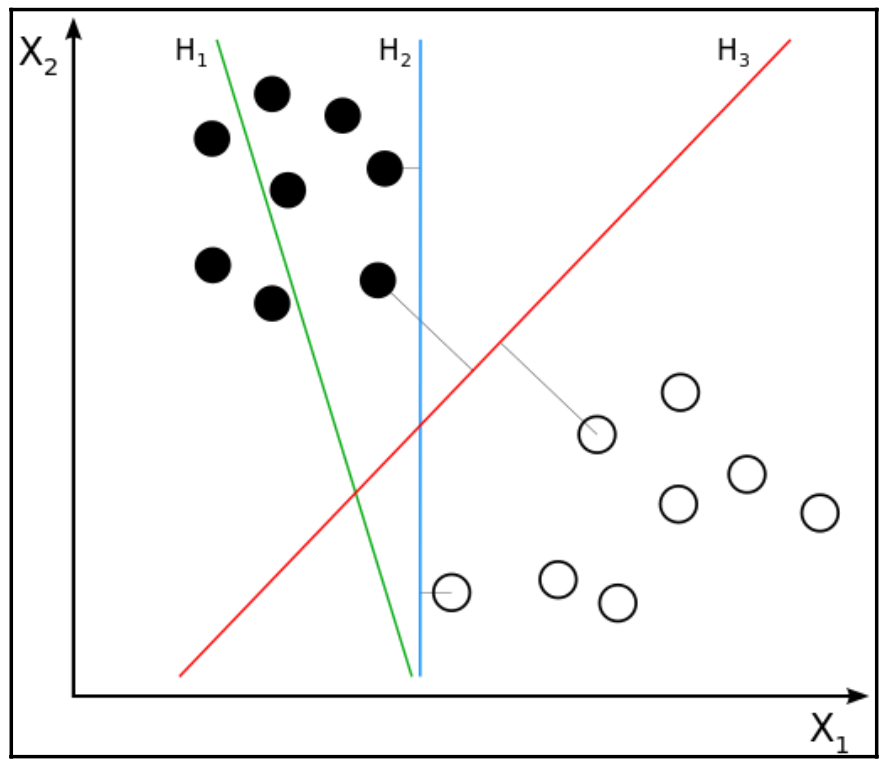

In [18]:
Image(filename = img_path + "SVM linear classifier_2 features.png", width=500, height=500)

#### SVM (linear) Description:
The SVM model is an algorithm that will try to linearly separate the data points into its respective classes, it does this by using a maximum-margin hyperplane. The hyperplane is no more than just a plane that separates the data.

To simplify the problem by taking a look at the image above, where there are 3 hyperplanes H1, H2 and H3. This example only deals with 2 features/dimensions. 
- H1 -> Immediately it can be seen that the H1 hyperplane does not discriminate well between the two classes.
- H2 -> Here there is a separation between the 2 features/classes/dimensions and it can be said that it has done so cleany.
- H3 -> This hyperplane does a better job, where it is called hte maximum-margine line, meaning that it is centered between the 2 classes with the 2 data points shown forming the support vectors.

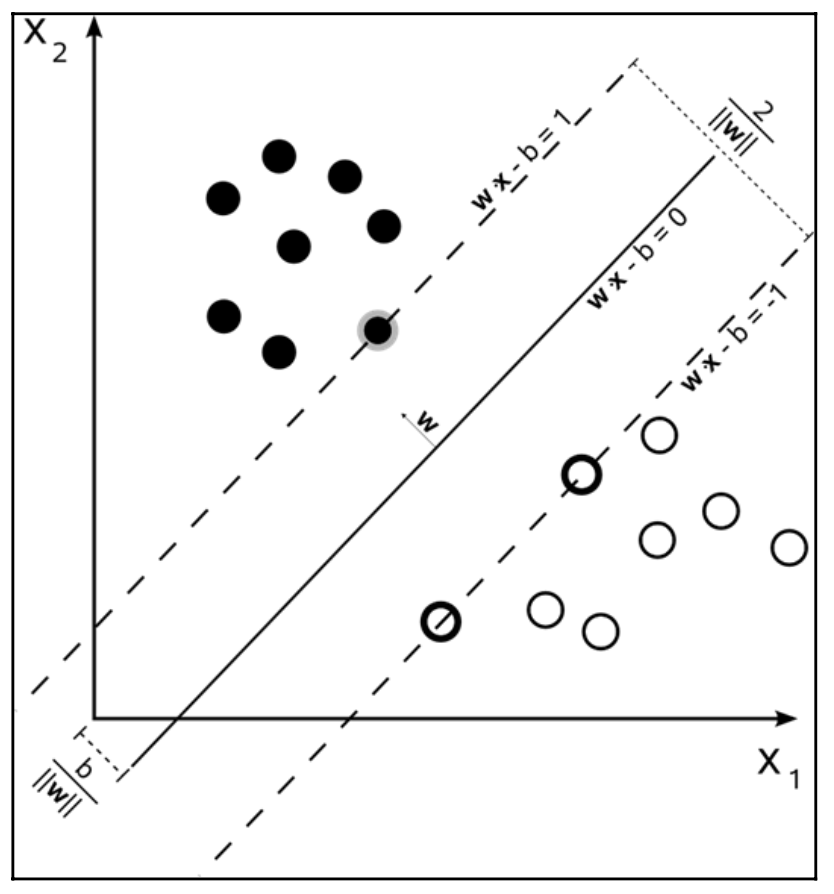

In [19]:
Image(filename = img_path + "SVM linear classifier_Hyperplane.png", width=500, height=500)

#### Support Vectors:

The support vectors are data points that lie or help form the dotted lines denoted as (w.x=b = -1 or w.x-b = +1). The hyperplane then remains between these support vectors.

#### Kernel Trick:

Suppose that the data is not as easy as the ones mentioned above, this means that the data points are not linearly separable. These cases can also be overlapping data points. Under these cases, the Linear SVM cannot be used, but there are alternatives such as Soft-Margin SVM or using the Kernal Trick.

- Soft-Margin SVM: is where similarly to Linear SVM. It does maximise the margin, however, it introduces a trade-off that penalises data points that falls within the worng side of the margin. Good reference: https://towardsdatascience.com/support-vector-machines-soft-margin-formulation-and-kernel-trick-4c9729dc8efe

- Kernal Trick: is a technique that transform the data points into a higher dimensional space (see the following 2 diagrams below) where it then linearly separates the data with the hyperplane.

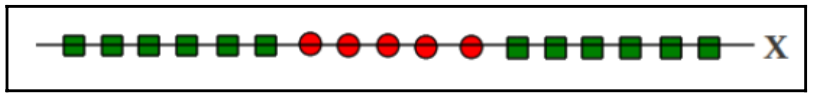

In [20]:
Image(filename = img_path + "SVM linear classifier_kernelTrick_before.png", width=500, height=500)

Image above is before the data points are transformed into the higher dimensional space.

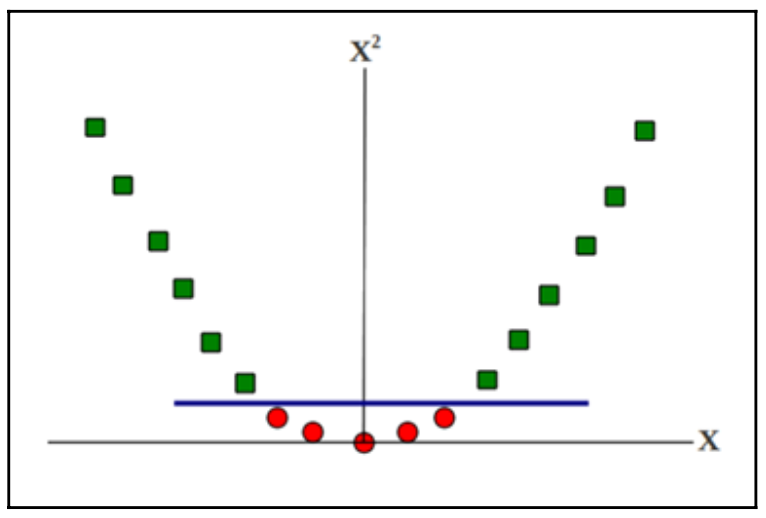

In [21]:
Image(filename = img_path + "SVM linear classifier_kernelTrick_after.png", width=500, height=500)

Image above is __when__ the data points are transformed into the higher dimensional space. Here the one-dimensional feature space is then transformed into a two-dimensional feature space. Notice that the hyperplane can now easily separate the 2 classes/features.

## 5.3 Classifiy the data with Linear SVM:

### Import the model:


In [22]:
from sklearn.svm import LinearSVC

In [23]:
# Fit the model to the data points: train the model.
model = LinearSVC()
model_fit = model.fit(vectoriser_fit, articles_df['wanted'])

#### It should be noted that the model won't be evaluated here, as this is considered generally a bad practice. However, this model will be continuously being updated with more liked and dis-liked articles, so model evaluation will be skipped for now.

## 6 Setting up the IFTTT service integration with feeds, Google Sheets and Email:
